# Malignant Comments Classifier Project:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Train Dataset:

In [3]:
df_train=pd.read_csv('Downloads/Malignant_Comments_classifier_Project/train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


The tarin dataset contains 159571 rows and 8 columns.
The data correctly read as it has confirmed with the head and tail code.
Given dataset contains 2 object data type and 6 are integer data type.


In [8]:
#Checking for the null values:

df_train.isnull()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


In [9]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
df_train.isnull().sum().sum()

0

<AxesSubplot:>

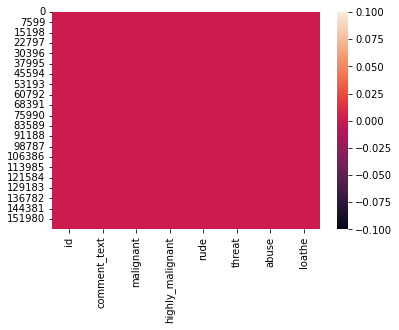

In [11]:
sns.heatmap(df_train.isnull())

From the above, we can say that the given dataset does not have any null value.

In [12]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [13]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The given dataset contains 8 columns, and now we have the statistical value for each column.

In [14]:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


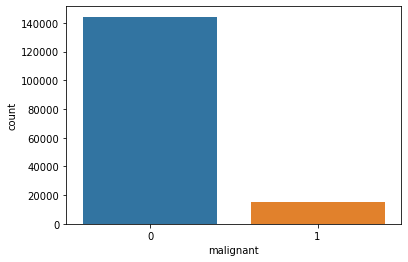

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


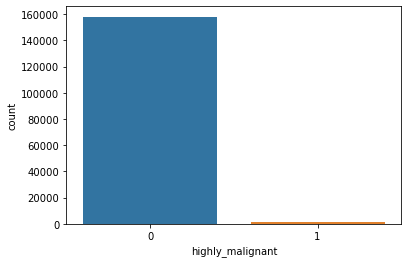

rude


0    151122
1      8449
Name: rude, dtype: int64


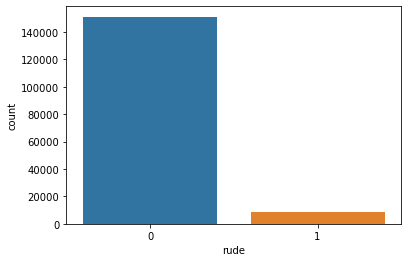

threat


0    159093
1       478
Name: threat, dtype: int64


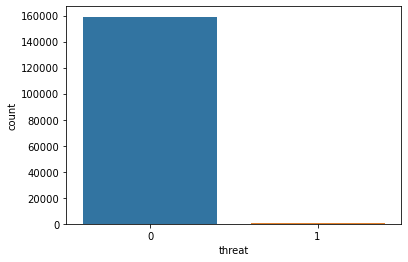

abuse


0    151694
1      7877
Name: abuse, dtype: int64


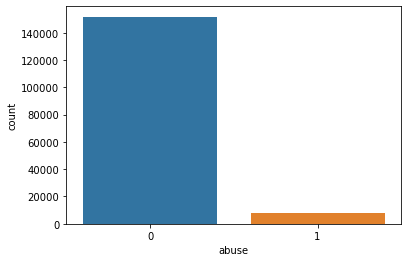

loathe


0    158166
1      1405
Name: loathe, dtype: int64


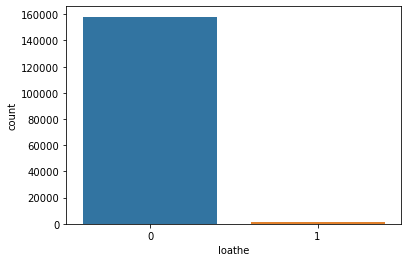

In [15]:
column_name=["malignant","highly_malignant","rude","threat","abuse","loathe"]
for i in column_name:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [16]:
#importing NLTK libraries
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [17]:
#since the feature 'id' has no relevance w.r.t. model training therefore dropping this feature
df_train.drop(columns=['id'],inplace=True)

In [18]:
#converting comment text to lowercase
df_train['comment_text'] = df_train.comment_text.str.lower()

#interpreting first 5 rows
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [19]:
#Replacing '\n' with ' '
df_train.comment_text = df_train.comment_text.str.replace('\n',' ')

#Keep only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc.
df_train.comment_text = df_train.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [20]:
#Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us","ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve","rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

#interpreting stop words
print(stop_words)

{'hey', 'v', 'lmk', "that's", "you've", 'this', 'once', 'no', 'r', 'up', 'just', "wasn't", 'while', 'lmfao', 'but', "shan't", 'between', "hasn't", 'its', "weren't", 'below', 'i', 'them', 'further', "i'll", 'me', 'should', "haven't", 'other', 'there', 'both', 'then', 'q', 'out', 'so', 'who', 'if', "i'm", 'mustn', 'your', 'herself', 'what', 'were', 'won', 'and', 'o', 'himself', 'theirs', 'doesn', 'ily', 'having', 'here', 'such', 'u', 'these', 'hasn', 'w', 'are', 'myself', 'shouldn', 'couldn', 'him', 'her', 'until', 'off', 'will', 'd', 'his', "he's", 'be', "mightn't", 'ofc', 'any', 'it', 'n', 'you', 'bbq', "you'll", 'than', 'lol', 'z', 'am', 'after', 'yolo', 'hers', "can't", 'h', 'in', 'for', 'x', 'nor', 've', 'y', 'omg', 'being', 'now', 'how', 'can', "isn't", 'j', 'l', 'more', 'haven', 'needn', 'yours', 'those', 'aren', 'where', 'hi', 'g', 'ikr', "you'd", 'm', "wouldn't", 'wouldn', 'that', 'don', 'c', 'b', "i've", 'because', 'down', "it's", "should've", "she'll", 'umm', 'smh', 'all', 're

In [21]:
#Removing stop words
df_train.comment_text = df_train.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [22]:
#Removing punctuations
df_train.comment_text = df_train.comment_text.str.replace("[^\w\d\s]","")

In [23]:
#Interpreting any 10 random rows to see change
df_train.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
5448,yo whatever shit leave alone deadass deleted e...,1,0,1,0,1,0
8419,time original edits page liberal party austral...,0,0,0,0,0,0
59974,yeah khar removed sourced link claim pashtun s...,1,0,0,0,0,1
122910,elephanta island started expanding artcile par...,0,0,0,0,0,0
127163,go fuck conrad black cheated thousands people ...,1,0,1,0,1,0
55144,removed warning full shit,1,0,1,0,0,0
56767,sorry false editing son went nd account edited...,0,0,0,0,0,0
136527,yes everyone thinks second class compared euro...,0,0,0,0,0,0
59306,perhaps might like drop note de page noting us...,0,0,0,0,0,0
24933,really satisifed language either editor recent...,0,0,0,0,0,0


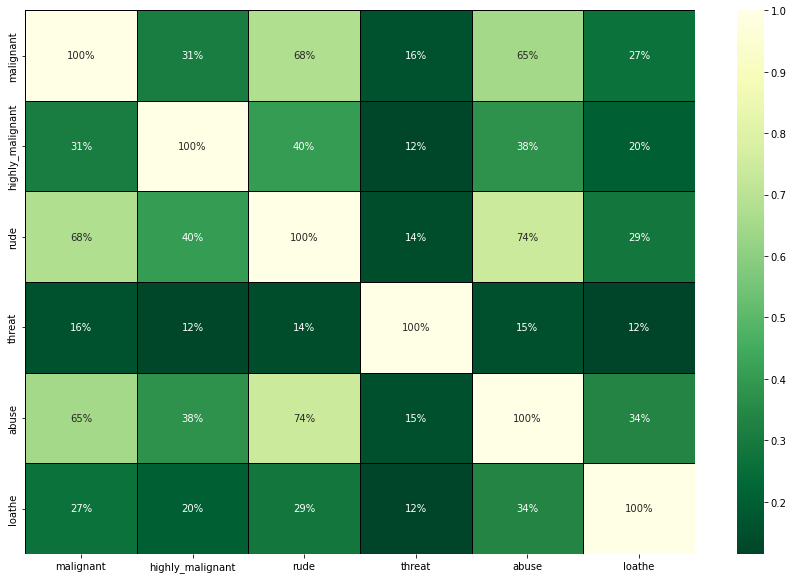

In [24]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df_train.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

# Test Dataset:

In [29]:
df_test=pd.read_csv('Downloads/Malignant_Comments_classifier_Project/test.csv')

In [30]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [31]:
df_test.shape

(153164, 2)

In [32]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [33]:
df_test.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


The given test dataset contains 153164 rows and 2 columns, and both columns is of object data type.

# Checking null values for test dataset:

In [35]:
df_test.isnull()

,id,comment_text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
153159,False,False
153160,False,False
153161,False,False
153162,False,False


In [36]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [37]:
df_test.isnull().sum().sum()

0

In [38]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

<AxesSubplot:>

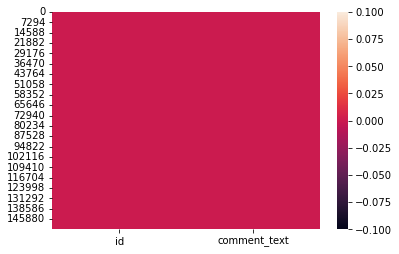

In [39]:
sns.heatmap(df_test.isnull())

From above, we can say that given dataset does not contains any null value.

In [40]:
#To get the statistical value for each columns:

df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix

In [42]:
#Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df_train.comment_text).toarray()

#interpreting features
features.shape

(159571, 4000)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
y=df_train['malignant']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [63]:
y_train.shape,y_test.shape

((127656,), (31915,))

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
df = DecisionTreeClassifier()

In [66]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
df.score(x_test,y_test)

0.9408741970860097

In [68]:
y_pred = df.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28859
           1       0.70      0.67      0.69      3056

    accuracy                           0.94     31915
   macro avg       0.83      0.82      0.83     31915
weighted avg       0.94      0.94      0.94     31915



In [70]:
cm=confusion_matrix(y_test,df.predict(x_test))
print(cm)

[[27970   889]
 [  998  2058]]


In [72]:
rf = RandomForestClassifier()


In [73]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [74]:
rf.score(x_test,y_test)

0.9572301425661914

In [75]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.84      0.69      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.90      0.84      0.87     31915
weighted avg       0.95      0.96      0.96     31915



In [76]:
cm=confusion_matrix(y_test,df.predict(x_test))

In [77]:
print(cm)

[[27970   889]
 [  998  2058]]


In [78]:
lm = LogisticRegression()

In [79]:
lm.fit(x_train,y_train)

LogisticRegression()

In [80]:
lm.score(x_test,y_test)

0.9564154786150713

In [81]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [82]:
gb.score(x_test,y_test)

0.9413755287482375

In [83]:
y_pred = gb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28859
           1       0.94      0.41      0.57      3056

    accuracy                           0.94     31915
   macro avg       0.94      0.71      0.77     31915
weighted avg       0.94      0.94      0.93     31915



In [84]:
cm=confusion_matrix(y_test,df.predict(x_test))
print(cm)

[[27970   889]
 [  998  2058]]


In [85]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [86]:
ad.score(x_test,y_test)

0.9474855083816387

In [87]:
y_pred = ad.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28859
           1       0.87      0.53      0.66      3056

    accuracy                           0.95     31915
   macro avg       0.91      0.76      0.81     31915
weighted avg       0.94      0.95      0.94     31915



In [88]:
cm=confusion_matrix(y_test,ad.predict(x_test))
print(cm)

[[28627   232]
 [ 1444  1612]]


In [89]:
from sklearn import preprocessing, neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
clf.score(x_test,y_test)

0.9228262572458091

In [92]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [93]:
predict=rf.predict(test_data)
predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Cross Validation:

In [116]:
from sklearn.model_selection import cross_val_score


In [97]:
from sklearn.model_selection import GridSearchCV

In [100]:
rf_grid=GridSearchCV(RandomForestClassifier(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [121]:
import joblib

In [122]:
joblib.dump(rf,'comm.pkl')

['comm.pkl']

THE END